In [13]:
## Instalación de the Joker
# https://thejoker.readthedocs.io/en/latest/
#pip install thejoker

In [4]:
import matplotlib.pyplot as plt
import astropy.units as u
import thejoker as tj
import numpy as np

from thejoker import JokerPrior, TheJoker, RVData
from thejoker.plot import plot_rv_curves


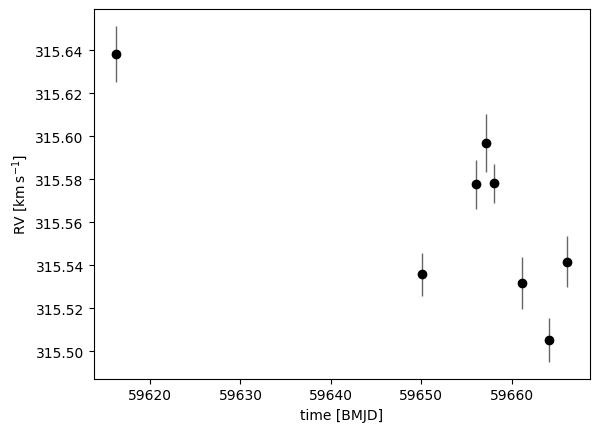

In [5]:
# Definiendo las variables
t = [59616.23644604064, 59650.10541174411, 59656.05310538688, 59657.12322433722, 59658.06083902933, 59661.1028844865, 59664.12167293875, 59666.11853265618]
rv = [315.6384, 315.5357, 315.5778, 315.5968, 315.5781, 315.5318, 315.5052, 315.5417] * u.km/u.s
err = [0.013, 0.0098, 0.0114, 0.0136, 0.0091, 0.012, 0.0102, 0.0118] * u.km/u.s
data = tj.RVData(t=t, rv=rv, rv_err=err)
ax = data.plot()  

In [6]:
## Definiendo los priors
data = RVData(t=t, rv=rv, rv_err=err)
prior = JokerPrior.default(P_min=2*u.day, P_max=100*u.day,sigma_K0= ((max(rv)-min(rv))/2), sigma_v = np.mean(rv))
joker = TheJoker(prior)

print("Listo")

Listo


In [7]:
prior

<JokerPrior [P, e, omega, M0, s, K, v0]>

In [8]:
## Generando los priors sample
rng = np.random.default_rng(seed=42) # pequeño retraso en el tiempo 
prior_samples1 = prior.sample(size=1_000_000, rng=rng) # Este es el número de priors que se generan

In [9]:
samples1 = joker.rejection_sample(data, prior_samples1, max_posterior_samples=256)
samples1 = samples1.wrap_K()

#samples1.write("samples1.hdf5", overwrite=False)  #Es la forma de guardar los posterior en un archivo para poder llamarlos luego

In [10]:
samples1

<JokerSamples [P, e, omega, M0, s, K, v0] (24 samples)>

(315.35, 315.8)

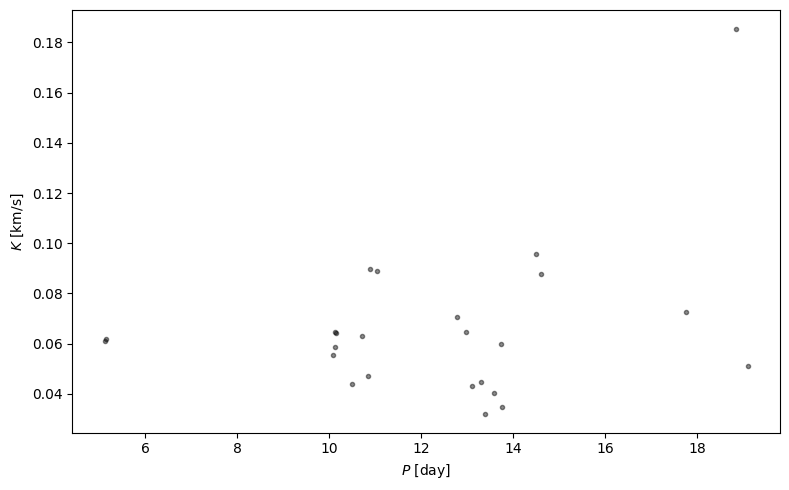

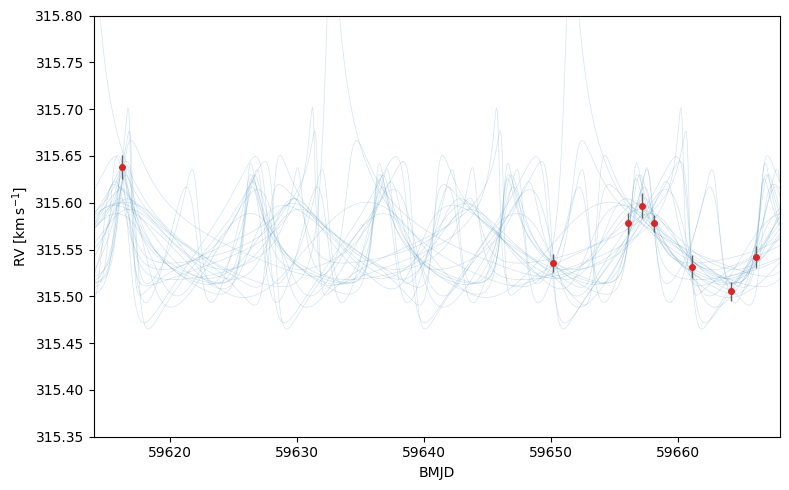

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
ax.scatter(samples1['P'].value, samples1['K'].to(u.km/u.s).value,marker='.', color='k', alpha=0.45)

ax.set_xlabel("$P$ [day]")
ax.set_ylabel("$K$ [km/s]")

fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
t_grid = np.linspace(59614, 59668, 1024)

_ = tj.plot_rv_curves(samples1,data=data,plot_kwargs=dict(color="tab:blue"),data_plot_kwargs=dict(color="tab:red"),relative_to_t_ref=False,ax=ax)

ax.set_xlim(59614, 59668)
ax.set_ylim(315.35,315.8)